# 잔차 분석

시계열 모형에 대한 모형 차수 결정(model order specification)과 모수 추정(parameter estimation)이 끝난 다음에는 모형화가 제대로 이루어졌는지를 검사하는 모형 진단(model diagnosis)을 실시해야 한다.

시계열 모형 진단을 위한 가장 기본적인 분석 방법은 잔차 분석(residual analysis)이다.

## 잔차

모형 진단에서 **잔차(residual)**는 **주어진 시계열을 생성하기 위해 입력되었던 백색 잡음에 대한 추정값**을 말한다.

**백색잡음의 잔차이므로 자기상관계수는 0이어야 한다( 예측이 불가능하다. 차수가 앞인 백색잡음은 뒷 차수에 나오는 백색잡음과 아무런상관이 없다) 즉, 잔차도 0이어야한다 **


잔차는 주어진  $y$ 값과 모형의 수식과 계수를 이용하여 구한다. 예를 들어 다음과 같은 ARMA(2) 모형의 경우,

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + e_t $$

다음 수식을 이용하여 잔차 $e_t$를 계산할 수 있다.

$$ \hat{e}_t = Y_t - \left( \phi_1 Y_{t-1} - \phi_2 Y_{t-2} \right) $$

잔차는 **값 $Y_t$와 모형에서 추정된 이 값에 대한 예측치의 차이**라고 볼 수 있다.  따라서 모형이 훌륭하다면 이 값은 더이상 예측할 수 있는 요소가 전혀 없는 시계열 즉, **가우시안 백색 잡음에 가까운 특성**을 보여야 한다.

잔차가 가우시안 백색 잡음인지 확인하기 위한 방법은 두가지이다.

* 잔차 분포의 정규성 검정
* 잔차의 자기상관계수가 $k=0$ 을 제외하고 모두 0(zero)

## 잔차의 정규성 검정

자료 분석에서 정규분포가 차지하는 비중이 크기 때문에 다음과 같이 많은 정규성 검정 방법이 개발되어 왔다.

* D'Agostino's K-squared test
* Shapiro-Wilk test
* Anderson-Darling tests
* Jarque-Bera test
* Lilliefors test
* Kolmogorov-Smirnov test


Python은 SciPy 패키지와 statsmodels 패키지에서 다음과 같은 정규성 검정 명령을 제공한다.


* scipy.stats 패키지에서 제공하는 정규분포 테스트 함수

  * [`normaltest`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html): 	D'Agostino's K-squared test
  * [`shapiro`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html): 	Shapiro-Wilk test
  * [`anderson`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html): 	Anderson-Darling tests

* statsmodels 패키지에서 제공하는 정규분포 테스트 함수

  * [`jarque_bera`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.jarque_bera.html): 	Jarque-Bera test
  * [`lillifors`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.lillifors.html): 	Lilliefors test
  * [`normal_ad`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.normal_ad.html): 	Anderson-Darling tests
  * [`omni_normtest`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.omni_normtest.html): 	normaltest 와 동일

## Box-Pierce 검정

Box-Pierce 검정은 차수 $k$까지의 ACF 값이 모두 0 이라는 것을 귀무 가설로 하고 있다. 즉 $k$가 큰 경우 실질적으로 검정 대상이 되는 시계열이 백색 잡음이라는 것을 귀무 가설로 하는 것과 같다.

Box-Pierce 검정에 사용되는 검정 통계량은 Q-value라고 하며 다음과 같이 정의된다.

$$ Q = n(\hat{r}_1^2 + \hat{r}_2^2 + \cdots + \hat{r}_k^2 ) $$

이 검정통계량은 ARMA(p,q) 확률 과정에 대해 자유도가 $k-p-q$ 카이 제곱(Chi-square) 분포를 따른다.

## Ljung-Box 검정

Ljung-Box 검정은 Box-Pierce 검정의 정확도를 개선한 검정 방법이다. 따라서 현재는 Box-Pierce 검정 대신 Ljung-Box 검정이 쓰인다.

Ljung-Box 검정의 검정 통계량은 다음과 같이 정의된다.

$$ Q_{\ast} = n(n+2)\left(\dfrac{\hat{r}_1^2}{n-1} + \dfrac{\hat{r}_2^2}{n-2} + \cdots + \dfrac{\hat{r}_k^2}{n-k} \right) $$

statsmodels 패키지는 Ljung-Box 검정을 위한 [`statsmodels.stats.diagnostic.acorr_ljungbox`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html) 명령을 제공한다.

## 실제 시계열 잔차 분석의 예

실제 시계열 자료에 대해 잔차 분석을 실시해 보자. 대상 시계열은 Cryer and Chan 의 화학공정 (color) 시계열이다. 이 시계열에 대한 모형 추정은 관련 노트북을 참조한다.

[[school_notebook:1a8a1c03103543168bdd43f780e7dbfe]]

In [1]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

## Anaconda: localhost:8890
## python3: localhost:8888


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [2]:
df = pd.read_csv("data/tsa/color.dat")
df.plot();

FileNotFoundError: File b'data/tsa/color.dat' does not exist

이 시계열을 AR(1) 모형으로 보고 모수를 추정한 결과는 다음과 같다.

In [2]:
m = sm.tsa.ARMA(df.color.astype(float).values, (1, 0))
r = m.fit()
print(r.summary())
## log likeihood가 클수록 좋다 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   35
Model:                     ARMA(1, 0)   Log Likelihood                -106.074
Method:                       css-mle   S.D. of innovations              4.983
Date:                Fri, 29 Apr 2016   AIC                            218.147
Time:                        13:47:39   BIC                            222.813
Sample:                             0   HQIC                           219.758
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         74.3293      1.915     38.813      0.000        70.576    78.083
ar.L1.y        0.5705      0.144      3.975      0.000         0.289     0.852
                                    Roots           

잔차는 다음과 같다.

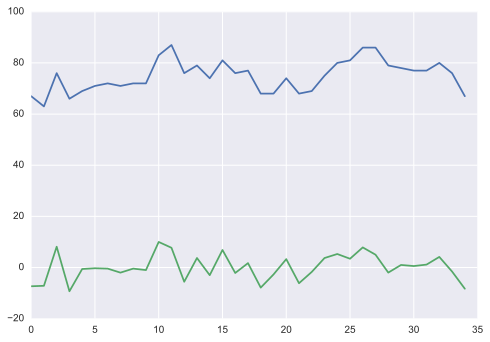

In [6]:
plt.plot(df.color.values)
plt.plot(r.resid);

우선 잔차의 정규성을 확인하기 위해 QQ-Plot을 그린다.

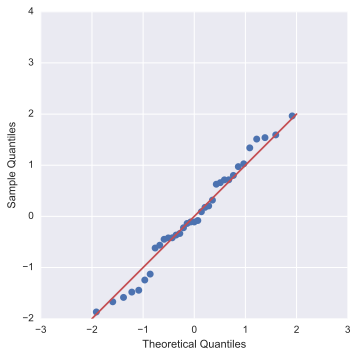

In [7]:
sm.qqplot(r.resid, fit=True, line='45');
plt.gca().axis("square");

정규성 검정 결과는 다음과 같다. p-value가 60% 이상이므로 정규 분포라고 볼 수 있다.

In [9]:
sp.stats.normaltest(r.resid)

NormaltestResult(statistic=1.0123598410127794, pvalue=0.602793906761666)

이제 잔차의 샘플 자기상관계수 함수를 살펴보자

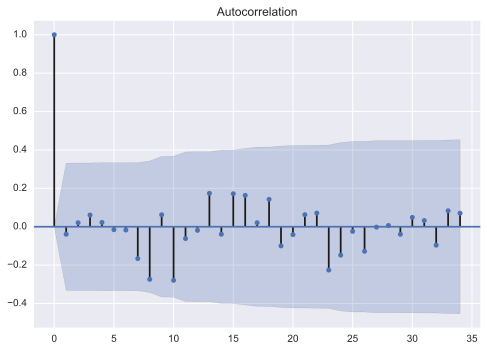

In [18]:
sm.graphics.tsa.plot_acf(r.resid);

Ljung-Box 검정 결과는 다음과 같다. 시차 20까지의 모든 p-value 가 50% 이상이므로 ACF가 0이라는 귀무가설을 받아들일 수 있다.

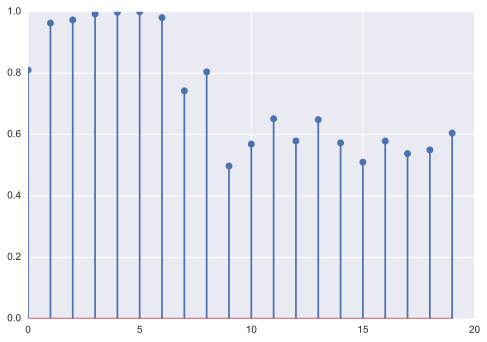

In [30]:
qvalue, pvalue = sm.stats.acorr_ljungbox(r.resid, 20)
plt.stem(pvalue);